<a href="https://colab.research.google.com/github/tl614-rutgers/gisTest/blob/main/ps1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Colab is an online place (cloud) for running Python notebooks--we will use it to run our code :)

You can just edit and adjust and and run the notebook I gave you [this file!]: don't forget to first save it!!!: File-Save a copy in GitHub

And after adjusting to run with your own data, you can submit it as ps :)

After making edits, while can diff on GitHub, its clunky, better here: File-Revision History

(a sidenote: File-Download it and convert to pdf: https://2pdf.com/convert-ipynb-to-pdf)

make webbrowser fullscreen and collapse upper menu (arrow on the right), especially on laptop

In [2]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

https://geopandas.org/

a sister of pandas; does the job; tho not as fancy-interactive as folium or leafmap

just quick focus here on thematic/choloropleth maps: coloring polygons (states, counties, etc) with values of a var, say crime: green=low, red=hi

REFS (also good for self study):

https://geopandas.org/en/stable/gallery/choropleths.html

https://geopandas.org/en/stable/gallery/choro_legends.html

https://geopandas.org/en/stable/gallery/geopandas_rasterio_sample.html

In [3]:
!pip install mapclassify
import mapclassify #need for thematic map classification

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 1.6 MB/s eta 0:00:00


### [sep5] mapping your area of interest

say you are interested in NJ counties, so just google that geography + "shapefile", i.e., "NJ counties shapefile"

maps have their own files, a popular one is 'shapefile'--have it zipped--one shapefile consists of several files--keep them in one zipped folder and dont change their names

In [4]:
#i found one and reposted on my website, download it onto colab:
! wget -q -O nj-counties.zip https://docs.google.com/uc?id=1xJDhcRCkgv7k4tNCa72Oog5bohV6dTB2&export=download

zip_ref = zipfile.ZipFile('nj-counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
njC=gpd.read_file('nj_counties.shp') #load the shapefile with gpd as njC

<Axes: >

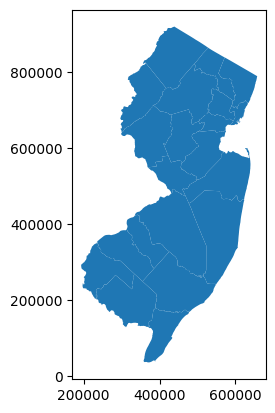

In [4]:
#make the map
njC.plot()

### [sep12] dive into thematic/choloropleth maps
mapping var from gis datafile--sometimes lucky and have the variable we want to map in the shapefile

thematic or choloropleth maps are they key skill you will learn here--these are maps where we color code polygons (or lines or points) with levels of a variable, say green for low covid19, yellow for moderate, and red for high

In [10]:
! wget -q -O nj-counties.zip https://docs.google.com/uc?id=1xJDhcRCkgv7k4tNCa72Oog5bohV6dTB2&export=download
zip_ref = zipfile.ZipFile('nj-counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
njC=gpd.read_file('nj_counties.shp') #load the shapefile with gpd as njC

In [6]:
njC.dtypes #with geopandas can do stuff like with pandas :)

COUNTY          object
COUNTY_LAB      object
CO              object
GNIS_NAME       object
GNIS            object
FIPSSTCO        object
FIPSCO          object
ACRES          float64
SQ_MILES       float64
POP2010          int64
POP2000          int64
POP1990          int64
POP1980          int64
POPDEN2010       int64
POPDEN2000       int64
POPDEN1990       int64
POPDEN1980       int64
REGION          object
Shape_Leng     float64
Shape_Area     float64
geometry      geometry
dtype: object

In [7]:
njC.head(2)

,COUNTY,COUNTY_LAB,CO,GNIS_NAME,GNIS,FIPSSTCO,FIPSCO,ACRES,SQ_MILES,POP2010,...,POP1990,POP1980,POPDEN2010,POPDEN2000,POPDEN1990,POPDEN1980,REGION,Shape_Leng,Shape_Area,geometry
0,ATLANTIC,Atlantic County,ATL,County of Atlantic,882270,34001,1,390815.404215,610.649069,274549,...,275372,204615,450,414,451,335,COASTAL,650228.153906,1.702385e+10,"POLYGON ((443056.010 311529.770, 443068.440 31..."
1,BERGEN,Bergen County,BER,County of Bergen,882271,34003,3,153490.275182,239.828555,905116,...,829592,849843,3774,3686,3459,3544,NORTHEASTERN,443326.122021,6.686010e+09,"POLYGON ((656200.963 783614.366, 656141.127 78..."


<Axes: >

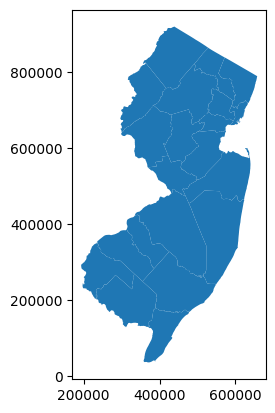

In [8]:
njC.plot() #yay love the shape

<Axes: >

[]

[]

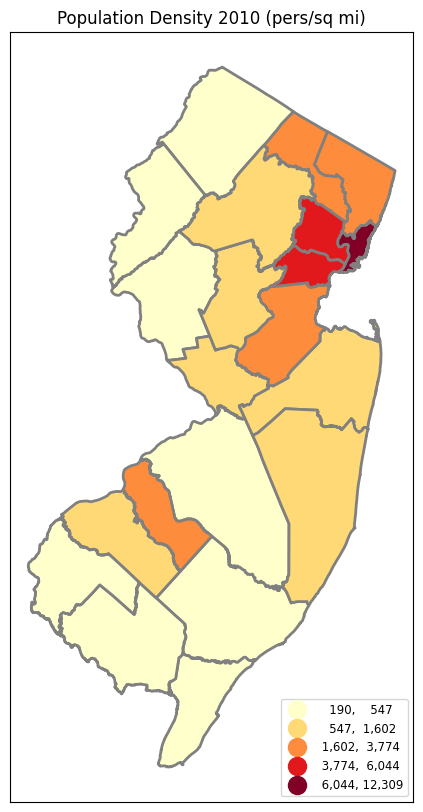

In [14]:
#your first thematic map! :) lets unpack options real quick esp fmt for dec pts; more later under 'bells and whistles'
fig, ax = plt.subplots(1, figsize=(6,10)) #fig = figure object, figsize is read as 6x10 (6 wide and 10 tall)
njC.plot(ax=ax,column='POPDEN2010',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #let python know which
        #column (variable) we want to map, always have a legend so it's True, cmap shows the color that you prefer and
        #the different shades of it, k is the number of classes (k = 5 shows 5 different colors), 5 is the common number
        #edgecolor are the lines in the map, linewidth represents the thickness of the lines in the map, legend_keywords
        #formats the number in the legend (0f means 0 decimal points, if put 2f --> 2 decimal points), markerscale
        #represents the size of the colored circles in the legend
#leg1 = ax.get_legend()
#leg1.set_title('''Population Density
#2010 (pers/sq mi)''')
ax.title.set_text("Population Density 2010 (pers/sq mi)")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

In [ ]:
# we can overlay layers; lets get nj uni shapefile on it
!wget -q -O col.zip  https://docs.google.com/uc?id=1bb9KES6QDE7cleE4L38yQ7939LlXUHB5&export=download
zip_ref = zipfile.ZipFile('col.zip', 'r');zip_ref.extractall(); zip_ref.close()

col = gpd.read_file('2007_11_30_NJ_COLL_UNIV_njsp.shp')
col.dtypes
col.head(3)

ID              object
METLNKID       float64
FEATTYPE        object
SECCLASS        object
NAME            object
AREA            object
PHONE           object
ADDRESS         object
ADDRESS2        object
CITY            object
STATE           object
ZIP             object
ZIPP4           object
COUNTY          object
FIPS            object
DIRECTIONS      object
EMERGTITLE     float64
EMERGPHONE     float64
EMERGEXT       float64
CONTDATE        object
CONTHOW         object
GEODATE         object
GEOHOW          object
NAICSCODE       object
NAICSDESCR      object
GEOLINKID       object
X              float64
Y              float64
ST_VENDOR       object
ST_VERSION      object
GEOPREC         object
PHONELOC        object
QC_QA           object
DEGREE          object
ENROLL          object
geometry      geometry
dtype: object

,ID,METLNKID,FEATTYPE,SECCLASS,NAME,AREA,PHONE,ADDRESS,ADDRESS2,CITY,...,X,Y,ST_VENDOR,ST_VERSION,GEOPREC,PHONELOC,QC_QA,DEGREE,ENROLL,geometry
0,10273936,NaN,POINT,UNCLASSIFIED,RAMAPO COLLEGE OF NEW JERSEY,201,684-7500,505 RAMAPO VALLEY RD,NaN,MAHWAH,...,-74.177826,41.082642,NAVTEQ,2006Q4,BLOCKFACE,NaN,NaN,MASTER'S DEGREE,5538,POINT (580936.143 819465.262)
1,10273934,NaN,POINT,UNCLASSIFIED,NEW BRUNSWICK THEOLOGICAL SEMINARY,732,247-5241,17 SEMINARY PL,NaN,NEW BRUNSWICK,...,-74.448814,40.501346,NAVTEQ,2006Q4,BLOCKFACE,NaN,NaN,DOCTOR'S DEGREE,203,POINT (506358.894 607539.257)
2,10273932,NaN,POINT,UNCLASSIFIED,MONMOUTH UNIVERSITY,732,571-3400,400 CEDAR AVE,NaN,WEST LONG BRANCH,...,-74.003765,40.281505,NAVTEQ,2006Q4,BLOCKFACE,NaN,NaN,POST-MASTER'S CERTIFICATE,6351,POINT (630565.964 527840.459)


In [ ]:
col['enr'] = col.ENROLL.astype(float)

<Axes: >

<Axes: >

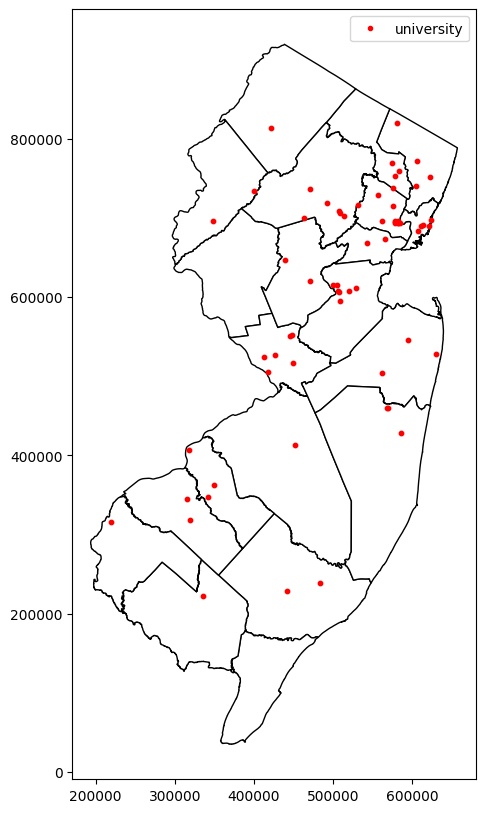

In [ ]:
#and now overlay
fig, ax = plt.subplots(1, figsize=(6,10))
njC.plot(ax=ax, color='white', edgecolor='black',linewidth=1)
col.plot(ax=ax, marker='o', color='red', markersize=10,legend=True)
#col.plot(column='enr',markersize=50,legend=True,cmap='RdYlGn_r',scheme='QUANTILES',k=5,ax=ax)
#ax.set_title('Watersheds by area ($mi^2$)')

#custom legend
#https://stackoverflow.com/questions/39500265/how-to-manually-create-a-legend
#import matplotlib.patches as mpatches
#red_patch = mpatches.Patch(color='red', label='The red data')
from matplotlib.lines import Line2D
point = Line2D([0], [0], label='university', marker='o', markersize=3,
         markeredgecolor='r', markerfacecolor='r', linestyle='')
plt.legend(handles=[point])

## join/merge
 awesome power! use it a lot

### housing/zillow example

say want to map housing values across nj counties

first need to get the map with counties (already got it)

then get regular data with housing values and merge with counties data

and finaly color code the polygons with housing values




we've got housing prices for NJ counties from zillow (http://www.zillow.com/research/data):

https://github.com/theaok/data/raw/main/NJ-counties-Zillow-Home-Value-Index-TimeSeries.xls



adjust ID: make counties uppercase (or could drop 'County' from COUNTY LABEL variable)

make col (var) names short: eg =<5 alphanumeric chars

and clean up:  drop first row if junk in it, excessive columns, \$ \%,\#, etc

code everything so the end product is like:

https://raw.githubusercontent.com/theaok/data/main/all_homes.csv


In [5]:
zilXls=pd.read_excel('https://github.com/theaok/data/raw/main/NJ-counties-Zillow-Home-Value-Index-TimeSeries.xls')

In [6]:
zilXls.head(2)

,NJ Zillow Home Value Index - All Homes,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200,Unnamed: 201,Unnamed: 202,Unnamed: 203
0,Region Name,Region Type,Data Type,1996-04-15 00:00:00,1996-05-15 00:00:00,1996-06-15 00:00:00,1996-07-15 00:00:00,1996-08-15 00:00:00,1996-09-15 00:00:00,1996-10-15 00:00:00,...,2012-03-15 00:00:00,2012-04-15 00:00:00,2012-05-15 00:00:00,2012-06-15 00:00:00,2012-07-15 00:00:00,2012-08-15 00:00:00,2012-09-15 00:00:00,2012-10-15 00:00:00,2012-11-15 00:00:00,2012-12-15 00:00:00
1,New Jersey,state,All Homes,130200,129700,129700,130000,129500,128400,130300,...,256600,257000,257000,257100,256600,256100,256900,258300,259100,259700


In [17]:
zilXls.dtypes

NJ Zillow Home Value Index - All Homes    object
Unnamed: 1                                object
Unnamed: 2                                object
Unnamed: 3                                object
Unnamed: 4                                object
                                           ...  
Unnamed: 199                              object
Unnamed: 200                              object
Unnamed: 201                              object
Unnamed: 202                              object
Unnamed: 203                              object
Length: 204, dtype: object

In [7]:
zilXls1=zilXls[['NJ Zillow Home Value Index - All Homes','Unnamed: 203']]
zilXls1.rename(columns={'NJ Zillow Home Value Index - All Homes': 'county'}, inplace=True)
zilXls1.rename(columns={'Unnamed: 203': 'dec2012'}, inplace=True)
zilXls1
#renaming column names --> take the actual column name and change it to the name you want

<ipython-input-7-93f139897a82>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zilXls1.rename(columns={'NJ Zillow Home Value Index - All Homes': 'county'}, inplace=True)
<ipython-input-7-93f139897a82>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zilXls1.rename(columns={'Unnamed: 203': 'dec2012'}, inplace=True)


,county,dec2012
0,Region Name,2012-12-15 00:00:00
1,New Jersey,259700
2,Atlantic,185800
3,Bergen,380000
4,Burlington,197800
5,Camden,149400
6,Cape May,313600
7,Cumberland,120100
8,Essex,282800
9,Gloucester,175900


In [11]:
zilXls2=zilXls1.iloc[1:, :]
zilXls2 #note missing val for Morris; always think abt missing data!

,county,dec2012
1,New Jersey,259700
2,Atlantic,185800
3,Bergen,380000
4,Burlington,197800
5,Camden,149400
6,Cape May,313600
7,Cumberland,120100
8,Essex,282800
9,Gloucester,175900
10,Hudson,293100


In [12]:
zilXls2['COUNTY']=zilXls2['county'].str.upper()
zil1=zilXls2
zil1

<ipython-input-12-b182bc7d4f0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zilXls2['COUNTY']=zilXls2['county'].str.upper()


,county,dec2012,COUNTY
1,New Jersey,259700,NEW JERSEY
2,Atlantic,185800,ATLANTIC
3,Bergen,380000,BERGEN
4,Burlington,197800,BURLINGTON
5,Camden,149400,CAMDEN
6,Cape May,313600,CAPE MAY
7,Cumberland,120100,CUMBERLAND
8,Essex,282800,ESSEX
9,Gloucester,175900,GLOUCESTER
10,Hudson,293100,HUDSON


In [8]:
#obsolete (was loading cleaned up already data without cleaning in py)
#!wget -q -O zillow.csv  https://docs.google.com/uc?id=1Q4tCZT0EfaJP_WGwKcxuPaQ_dDFonW4E&export=download
#!wget -q -O zil0.csv https://raw.githubusercontent.com/theaok/data/main/all_homes.csv
#zil0=pd.read_csv('zil0.csv')
#zil0.head(3)
#zil1=zil0[['UPPER','Dec 2012']]
#zil1.rename(columns={'UPPER': 'COUNTY'}, inplace=True) #fix col names to match 1st dataset
#zil1 #note missing val for Morris; always think abt missing data!

In [13]:
#merge
njC1 = pd.merge(njC, zil1, on='COUNTY',how='outer',indicator=True) #(make sure to have njC shapefile from previous sec)
njC1[['COUNTY','dec2012','POPDEN2010','_merge']] #all good, NEW JERSEY expected not to merge
#outer merge keeps everything in the resulting dataframe from the data of njC and zil1 (NJ was included even though it is
#only in zil1 dataset and not in njC dataset)
#inner merge keeps data that are included in all dataset (NJ is not included since it is not included in both datasets)

njC2 = pd.merge(njC, zil1, on='COUNTY',how='inner',indicator=False) #so do 'inner' that will only keep the exact matches

,COUNTY,dec2012,POPDEN2010,_merge
0,ATLANTIC,185800,450.0,both
1,BERGEN,380000,3774.0,both
2,BURLINGTON,197800,547.0,both
3,CAMDEN,149400,2257.0,both
4,CAPE MAY,313600,340.0,both
5,CUMBERLAND,120100,313.0,both
6,ESSEX,282800,6044.0,both
7,GLOUCESTER,175900,857.0,both
8,HUDSON,293100,12309.0,both
9,HUNTERDON,327000,293.0,both


<Axes: >

[]

[]

Text(0.5, 80.7222222222222, 'source/definition: zillow.com/research/data')

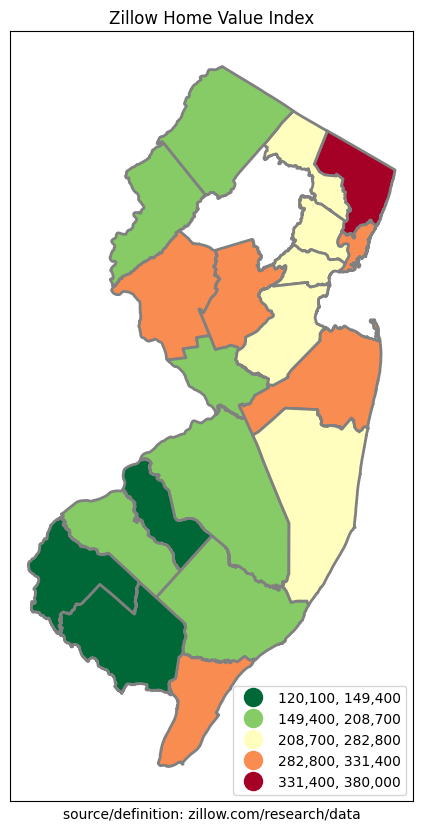

In [14]:
fig, ax = plt.subplots(1, figsize=(6,10))
njC2.plot(ax=ax,column='dec2012',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=2,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
#leg1 = ax.get_legend()
#leg1.set_title('''Population Density
#2010 (pers/sq mi)''')
ax.title.set_text("Zillow Home Value Index")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''source/definition: zillow.com/research/data''')
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

### abortions example

In [1]:
# get data: https://data.guttmacher.org/ has a nice API
# can click thru to get the table we want, which results in url (can open in webbrowser):
# https://data.guttmacher.org/counties/table?county=34001+34003+34005+34007+34009+34011+34013+34015+34017+34019+34021+34023+34025+34027+34029+34031+34033+34035+34037+34039+34041&topics=244+247&dataset=data&state=NJ
# and then can right click on 'download xls' (csv is messy in this case) button under the table and 'copy link address' and paste into wget (need quotes!):
!wget -q -O njAb.xls  "https://data.guttmacher.org/download?locationType=county&visualization=datatable&topic=244+247&locations=34001+34003+34005+34007+34009+34011+34013+34015+34017+34019+34021+34023+34025+34027+34029+34031+34033+34035+34037+34039+34041&measures=424+425+426+427+428+429+436+437+438+439+440+441+442&totalKey=NJ"

In [2]:
# alternatively can scrap the table
#import requests
#url = 'https://data.guttmacher.org/counties/table?county=34001+34003+34005+34007+34009+34011+34013+34015+34017+34019+34021+34023+34025+34027+34029+34031+34033+34035+34037+34039+34041&topics=244+247&dataset=data&state=NJ'
#header = {
#  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
#  "X-Requested-With": "XMLHttpRequest"
#}
#r = requests.get(url, headers=header)
#pd.read_html(r.text,match='U.S. County',flavor=None)[0].head(3) #for match just putting name of first col

In [7]:
njAb=pd.read_excel('njAb.xls')
njAb.head(3)

,U.S. County,"Total no. of female contraceptive clients served at publicly funded clinics, 2015 [1]","Total publicly funded clinics, 2015 [1]","No. of federally qualified health centers, 2015 [1]","Total no. of female contraceptive clients served at publicly funded clinics, younger than 20, 2015 [1]","No. of female contraceptive clients served at federally qualified health centers, 2015 [1]","No. of health department clinics, 2015 [1]","No. of female contraceptive clients served at health department clinics, 2015 [1]","No. of hospital-based clinics, 2015 [1]","No. of Planned Parenthood clinics, 2015 [1]","No. of female contraceptive clients served at hospital-based clinics, 2015 [1]","No. of female contraceptive clients served at Planned Parenthood clinics, 2015 [1]","No. of other clinics, 2015 [1]","No. of female contraceptive clients served at other clinics, 2015 [1]"
0,NJ Total,"109,940",121,75,"16,880","35,510",2,880,8,26,"5,840","59,530",10,"8,190"
1,Atlantic,"3,300",6,4,670 [2],"2,000",0,0,0,2,0,"1,300",0,0
2,Bergen,"10,380",6,3,"1,000","2,790",0,0,1,2,780,"6,810",0,0


In [19]:
#look at shapefile col names
njC #(make sure to have njC shapefile from previous sec)

,COUNTY,COUNTY_LAB,CO,GNIS_NAME,GNIS,FIPSSTCO,FIPSCO,ACRES,SQ_MILES,POP2010,...,POP1980,POPDEN2010,POPDEN2000,POPDEN1990,POPDEN1980,REGION,Shape_Leng,Shape_Area,geometry,U.S. County
0,ATLANTIC,Atlantic County,ATL,County of Atlantic,882270,34001,1,390815.404215,610.649069,274549,...,204615,450,414,451,335,COASTAL,650228.153906,1.702385e+10,"POLYGON ((443056.010 311529.770, 443068.440 31...",Atlantic
1,BERGEN,Bergen County,BER,County of Bergen,882271,34003,3,153490.275182,239.828555,905116,...,849843,3774,3686,3459,3544,NORTHEASTERN,443326.122021,6.686010e+09,"POLYGON ((656200.963 783614.366, 656141.127 78...",Bergen
2,BURLINGTON,Burlington County,BUR,County of Burlington,882272,34005,5,525002.683590,820.316693,448734,...,362542,547,516,482,442,SOUTHERN,788906.717476,2.286903e+10,"POLYGON ((436626.690 491361.780, 436701.190 49...",Burlington
3,CAMDEN,Camden County,CAM,County of Camden,882273,34007,7,145650.507808,227.578918,513657,...,471650,2257,2236,2340,2073,SOUTHERN,495010.034901,6.344511e+09,"POLYGON ((342763.990 423475.830, 342804.100 42...",Camden
4,CAPE MAY,Cape May County,CAP,County of Cape May,882274,34009,9,183126.574240,286.135272,97265,...,82266,340,358,332,288,COASTAL,514564.858771,7.976962e+09,"POLYGON ((390389.730 177065.130, 390410.170 17...",Cape May
5,CUMBERLAND,Cumberland County,CUM,County of Cumberland,882275,34011,11,321150.321572,501.797378,156898,...,132866,313,292,275,265,SOUTHERN,704221.618565,1.398925e+10,"POLYGON ((333743.882 268331.623, 341456.371 26...",Cumberland
6,ESSEX,Essex County,ESS,County of Essex,882276,34013,13,83034.859489,129.741968,783969,...,850451,6044,6118,5768,6556,NORTHEASTERN,344556.557700,3.616984e+09,"POLYGON ((541167.940 755990.810, 541175.500 75...",Essex
7,GLOUCESTER,Gloucester County,GLO,County of Gloucester,882277,34015,15,215166.893094,336.198271,288288,...,199917,857,758,684,595,SOUTHERN,560703.567470,9.372632e+09,"POLYGON ((315566.250 382993.340, 315650.440 38...",Gloucester
8,HUDSON,Hudson County,HUD,County of Hudson,882278,34017,17,32982.400794,51.535001,634266,...,556972,12309,11817,10733,10808,NORTHEASTERN,381357.990132,1.436708e+09,"MULTIPOLYGON (((586210.281 660143.720, 586222....",Hudson
9,HUNTERDON,Hunterdon County,HUN,County of Hunterdon,882228,34019,19,279885.206384,437.320635,128349,...,87361,293,279,246,200,CENTRAL,561760.929390,1.219175e+10,"POLYGON ((391770.815 705704.676, 392388.938 70...",Hunterdon


In [14]:
njC['U.S. County']=njC['COUNTY_LAB'].str.replace(' County','') #get rid of ' County' [note space in front of county]
njC.head(5)

,COUNTY,COUNTY_LAB,CO,GNIS_NAME,GNIS,FIPSSTCO,FIPSCO,ACRES,SQ_MILES,POP2010,...,POP1980,POPDEN2010,POPDEN2000,POPDEN1990,POPDEN1980,REGION,Shape_Leng,Shape_Area,geometry,U.S. County
0,ATLANTIC,Atlantic County,ATL,County of Atlantic,882270,34001,1,390815.404215,610.649069,274549,...,204615,450,414,451,335,COASTAL,650228.153906,1.702385e+10,"POLYGON ((443056.010 311529.770, 443068.440 31...",Atlantic
1,BERGEN,Bergen County,BER,County of Bergen,882271,34003,3,153490.275182,239.828555,905116,...,849843,3774,3686,3459,3544,NORTHEASTERN,443326.122021,6.686010e+09,"POLYGON ((656200.963 783614.366, 656141.127 78...",Bergen
2,BURLINGTON,Burlington County,BUR,County of Burlington,882272,34005,5,525002.683590,820.316693,448734,...,362542,547,516,482,442,SOUTHERN,788906.717476,2.286903e+10,"POLYGON ((436626.690 491361.780, 436701.190 49...",Burlington
3,CAMDEN,Camden County,CAM,County of Camden,882273,34007,7,145650.507808,227.578918,513657,...,471650,2257,2236,2340,2073,SOUTHERN,495010.034901,6.344511e+09,"POLYGON ((342763.990 423475.830, 342804.100 42...",Camden
4,CAPE MAY,Cape May County,CAP,County of Cape May,882274,34009,9,183126.574240,286.135272,97265,...,82266,340,358,332,288,COASTAL,514564.858771,7.976962e+09,"POLYGON ((390389.730 177065.130, 390410.170 17...",Cape May


In [13]:
njCAb = pd.merge(njC, njAb, on='U.S. County',how='outer',indicator=True)
njCAb.head(50) # ok fine just junk from the bottom like sources etc and NJ as state didnt merge, so can do clean inner merge

,COUNTY,COUNTY_LAB,CO,GNIS_NAME,GNIS,FIPSSTCO,FIPSCO,ACRES,SQ_MILES,POP2010,...,"No. of female contraceptive clients served at federally qualified health centers, 2015 [1]","No. of health department clinics, 2015 [1]","No. of female contraceptive clients served at health department clinics, 2015 [1]","No. of hospital-based clinics, 2015 [1]","No. of Planned Parenthood clinics, 2015 [1]","No. of female contraceptive clients served at hospital-based clinics, 2015 [1]","No. of female contraceptive clients served at Planned Parenthood clinics, 2015 [1]","No. of other clinics, 2015 [1]","No. of female contraceptive clients served at other clinics, 2015 [1]",_merge
0,ATLANTIC,Atlantic County,ATL,County of Atlantic,882270,34001,1,390815.404215,610.649069,274549.0,...,"2,000",0,0,0,2,0,"1,300",0,0,both
1,BERGEN,Bergen County,BER,County of Bergen,882271,34003,3,153490.275182,239.828555,905116.0,...,"2,790",0,0,1,2,780,"6,810",0,0,both
2,BURLINGTON,Burlington County,BUR,County of Burlington,882272,34005,5,525002.683590,820.316693,448734.0,...,480,0,0,1,1,580,"1,140",0,0,both
3,CAMDEN,Camden County,CAM,County of Camden,882273,34007,7,145650.507808,227.578918,513657.0,...,"1,490",0,0,2,2,"1,550","4,210",0,0,both
4,CAPE MAY,Cape May County,CAP,County of Cape May,882274,34009,9,183126.574240,286.135272,97265.0,...,660,2,880,0,0,0,0,0,0,both
5,CUMBERLAND,Cumberland County,CUM,County of Cumberland,882275,34011,11,321150.321572,501.797378,156898.0,...,"1,320",0,0,0,0,0,0,2,"1,230",both
6,ESSEX,Essex County,ESS,County of Essex,882276,34013,13,83034.859489,129.741968,783969.0,...,"4,300",0,0,0,4,0,"11,520",0,0,both
7,GLOUCESTER,Gloucester County,GLO,County of Gloucester,882277,34015,15,215166.893094,336.198271,288288.0,...,250,0,0,0,0,0,0,2,"1,230",both
8,HUDSON,Hudson County,HUD,County of Hudson,882278,34017,17,32982.400794,51.535001,634266.0,...,"8,600",0,0,0,0,0,0,3,"2,720",both
9,HUNTERDON,Hunterdon County,HUN,County of Hunterdon,882228,34019,19,279885.206384,437.320635,128349.0,...,0,0,0,0,1,0,690,0,0,both


In [15]:
njCAb = pd.merge(njC, njAb, on='U.S. County',how='inner',indicator=True) #inner merge
njCAb

,COUNTY,COUNTY_LAB,CO,GNIS_NAME,GNIS,FIPSSTCO,FIPSCO,ACRES,SQ_MILES,POP2010,...,"No. of female contraceptive clients served at federally qualified health centers, 2015 [1]","No. of health department clinics, 2015 [1]","No. of female contraceptive clients served at health department clinics, 2015 [1]","No. of hospital-based clinics, 2015 [1]","No. of Planned Parenthood clinics, 2015 [1]","No. of female contraceptive clients served at hospital-based clinics, 2015 [1]","No. of female contraceptive clients served at Planned Parenthood clinics, 2015 [1]","No. of other clinics, 2015 [1]","No. of female contraceptive clients served at other clinics, 2015 [1]",_merge
0,ATLANTIC,Atlantic County,ATL,County of Atlantic,882270,34001,1,390815.404215,610.649069,274549,...,"2,000",0,0,0,2,0,"1,300",0,0,both
1,BERGEN,Bergen County,BER,County of Bergen,882271,34003,3,153490.275182,239.828555,905116,...,"2,790",0,0,1,2,780,"6,810",0,0,both
2,BURLINGTON,Burlington County,BUR,County of Burlington,882272,34005,5,525002.683590,820.316693,448734,...,480,0,0,1,1,580,"1,140",0,0,both
3,CAMDEN,Camden County,CAM,County of Camden,882273,34007,7,145650.507808,227.578918,513657,...,"1,490",0,0,2,2,"1,550","4,210",0,0,both
4,CAPE MAY,Cape May County,CAP,County of Cape May,882274,34009,9,183126.574240,286.135272,97265,...,660,2,880,0,0,0,0,0,0,both
5,CUMBERLAND,Cumberland County,CUM,County of Cumberland,882275,34011,11,321150.321572,501.797378,156898,...,"1,320",0,0,0,0,0,0,2,"1,230",both
6,ESSEX,Essex County,ESS,County of Essex,882276,34013,13,83034.859489,129.741968,783969,...,"4,300",0,0,0,4,0,"11,520",0,0,both
7,GLOUCESTER,Gloucester County,GLO,County of Gloucester,882277,34015,15,215166.893094,336.198271,288288,...,250,0,0,0,0,0,0,2,"1,230",both
8,HUDSON,Hudson County,HUD,County of Hudson,882278,34017,17,32982.400794,51.535001,634266,...,"8,600",0,0,0,0,0,0,3,"2,720",both
9,HUNTERDON,Hunterdon County,HUN,County of Hunterdon,882228,34019,19,279885.206384,437.320635,128349,...,0,0,0,0,1,0,690,0,0,both


In [16]:
njCAb.dtypes

COUNTY                                                                                                      object
COUNTY_LAB                                                                                                  object
CO                                                                                                          object
GNIS_NAME                                                                                                   object
GNIS                                                                                                        object
FIPSSTCO                                                                                                    object
FIPSCO                                                                                                      object
ACRES                                                                                                      float64
SQ_MILES                                                                        

In [20]:
#need to convert string (object) to numeric (float or int; float is safer can have decimals if needed)
njCAb['publicly funded clinics, 2015'] = njCAb['Total publicly funded clinics, 2015 [1]'].astype(float)
#name of the new column = existing column name that you want to change

In [21]:
njCAb[['U.S. County','Total publicly funded clinics, 2015 [1]','publicly funded clinics, 2015']]

,U.S. County,"Total publicly funded clinics, 2015 [1]","publicly funded clinics, 2015"
0,Atlantic,6,6.0
1,Bergen,6,6.0
2,Burlington,4,4.0
3,Camden,10,10.0
4,Cape May,4,4.0
5,Cumberland,6,6.0
6,Essex,15,15.0
7,Gloucester,3,3.0
8,Hudson,14,14.0
9,Hunterdon,1,1.0


<Axes: >

[]

[]

Text(0.5, 1.0, 'count of publicly funded abortion clinics, 2015')

Text(0.5, 0.1, 'data from guttmacher.org\n            Publicly Funded Contraceptive Services at U.S. Clinics, 2015, Frost JJ, et al., 2017')

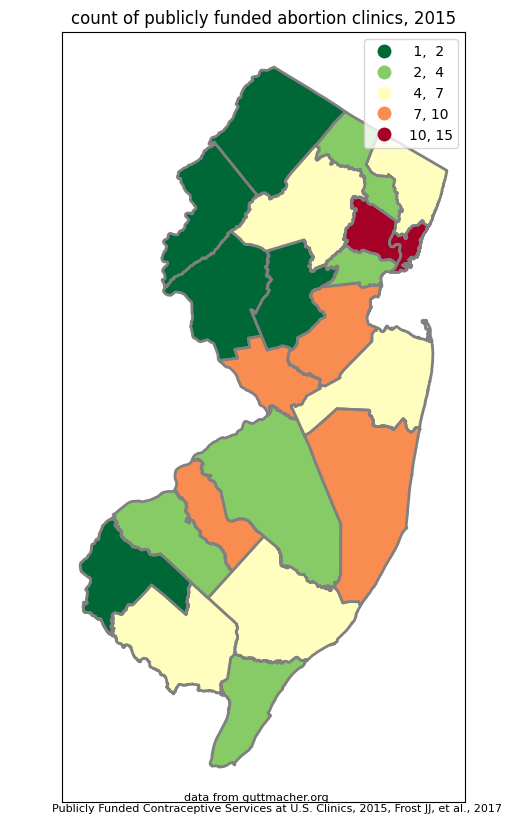

In [24]:
fig, ax = plt.subplots(figsize=(6,10))

njCAb.plot(ax=ax,figsize=(10,12),column='publicly funded clinics, 2015',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}"})
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_title('count of publicly funded abortion clinics, 2015')
#ax.annotate('Note added to chart with minimum parameters', xy = (200000, 1000))
plt.figtext(0.5, 0.1,
#this is a footnote of where the data came from
            '''data from guttmacher.org
            Publicly Funded Contraceptive Services at U.S. Clinics, 2015, Frost JJ, et al., 2017''',
            ha="center", fontsize=8, #bbox={"facecolor":"white", "alpha":0.5, "pad":5}
            )
#red indicates where most of the abortion clinics are at

### us census data example

census is a great source of data, even at neigh lev!

for neigh lev (census tracts)  want 5-yr ACS

https://geomap.ffiec.gov/FFIECGeocMap/GeocodeMap1.aspx

https://data.census.gov/cedsci/advanced

Geography: Tract: New Jersey: Camden County: All Census Tracts within Camden County

note: selection appears in the left panel

Topics: Income and Poverty: Poverty: Official Poverty Measure

Years: 2015

Search

click ``POVERTY STATUS IN THE PAST 12 MONTHS''  (ACS2011-2015 S1701)

(take note of margins of errors)

sure can transpose and download as csv but its a mess!




one rule to guide us is to be lazy/work smart, not hard

just find a decent alternative to messy census such as:

socialexplorer.com

ACS 2015-2019

SE:A13003B. Poverty Status in 2019 for Population Age 18 to 64

tracts in camden county nj

https://www.socialexplorer.com/tables/ACS2019_5yr/R13437109

downloaded as csv and reposted:
https://raw.githubusercontent.com/theaok/data/main/R13437109_SL140.csv



In [25]:
!wget -q -O pov.csv https://raw.githubusercontent.com/theaok/data/main/R13437109_SL140.csv

pov=pd.read_csv('pov.csv')
pov.head(3)

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,...,Geo_PCI,Geo_TAZ,Geo_UGA,Geo_BTTR,Geo_BTBG,Geo_PUMA5,Geo_PUMA1,SE_A13003B_001,SE_A13003B_002,SE_A13003B_003
0,34007600200,14000US34007600200,Census Tract 6002,"Census Tract 6002, Camden County, New Jersey",nj,140,0,ACSSF,1761,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1398,405,993
1,34007600400,14000US34007600400,Census Tract 6004,"Census Tract 6004, Camden County, New Jersey",nj,140,0,ACSSF,1762,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1793,725,1068
2,34007600700,14000US34007600700,Census Tract 6007,"Census Tract 6007, Camden County, New Jersey",nj,140,0,ACSSF,1763,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,847,394,453


In [26]:
#as per the above documentation we see prop in pov is SE_A13003B_002/SE_A13003B_001
pov['pov']=(pov.SE_A13003B_002/pov.SE_A13003B_001)*100

get geo data

https://www.census.gov/geo/maps-data/data/tiger-line.html

Download-Web Interface: 2019: Census Tracts: New Jersey

reposted:
https://github.com/theaok/data/raw/main/tl_2019_34_tract.zip

In [27]:
! wget -q -O tracts.zip https://github.com/theaok/data/raw/main/tl_2019_34_tract.zip
zip_ref = zipfile.ZipFile('tracts.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
#! ls
tracts=gpd.read_file('tl_2019_34_tract.shp')

<Axes: >

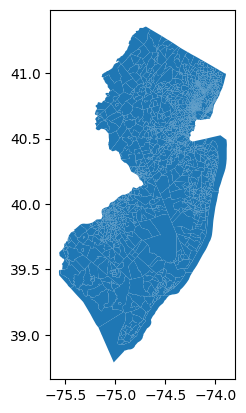

In [28]:
tracts.plot() #humongous, thousands of tracts!

In [ ]:
tracts.dtypes

STATEFP       object
COUNTYFP      object
TRACTCE       object
GEOID         object
NAME          object
NAMELSAD      object
MTFCC         object
FUNCSTAT      object
ALAND          int64
AWATER         int64
INTPTLAT      object
INTPTLON      object
geometry    geometry
dtype: object

In [ ]:
#tracts.head(3) #commented out because a lot of output; but have a look: geometries: x/y or lat/lon

In [30]:
tracts["COUNTYFP"].value_counts(dropna=False) #first column represents the county's id and the second column
#represents the neighborhoods and the result comes out as teh number of neighborhoods in that county's id

013    210
003    179
023    175
017    166
025    144
007    127
029    126
005    114
039    108
031    100
027    100
021     77
001     70
035     68
015     63
037     41
011     35
009     33
019     26
033     25
041     23
Name: COUNTYFP, dtype: int64

google it

https://www.google.com/search?client=firefox-b-1-d&q=nj+counties+fips+codes

https://en.wikipedia.org/wiki/List_of_counties_in_New_Jersey

In [32]:
tractsCam=tracts[tracts.COUNTYFP=='007'] #only want the data in camden county

<Axes: >

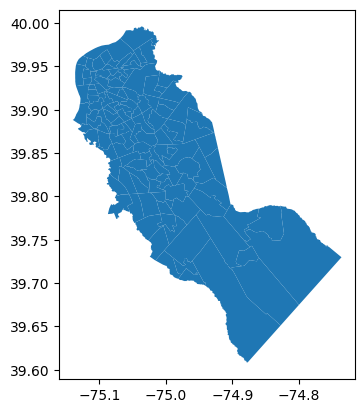

In [33]:
tractsCam.plot() #yay; shows the neighborhoods in camden county

In [34]:
a1 = pd.merge(tractsCam, pov, left_on='NAMELSAD', right_on='Geo_NAME',how='outer',indicator=True)

In [35]:
a1['_merge'].value_counts() #yay; shows what merged from the different datasets

both          127
left_only       0
right_only      0
Name: _merge, dtype: int64

<Axes: >

[]

[]

Text(0.5, 80.7222222222222, 'source/var def: socialexplorer.com/tables/ACS2019_5yr/R13437109')

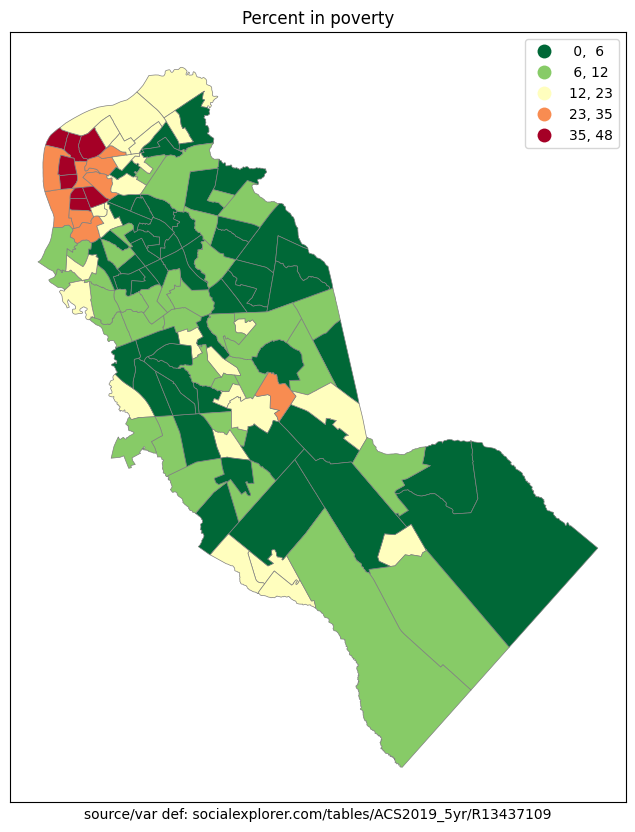

In [36]:
fig, ax = plt.subplots(figsize=(10,10))
a1.plot(ax=ax,column='pov',legend=True,cmap='RdYlGn_r', #_r means reverse so green is good and red is not
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=.5,legend_kwds= {"fmt": "{:,.0f}"})
ax.title.set_text("Percent in poverty")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''source/var def: socialexplorer.com/tables/ACS2019_5yr/R13437109''')
#interpretation: concentration of similar areas being with each other (green with green, red with red)

# bells and whistles (geopandas)
TODO expand massively on geopandas all bells and whistles
TODO do a bit of pandas for dat man like reading in data and looking at it!!

matplotlib options like side by side

putting txt box onto it

and other advanced stuff from my vis class as per matplotlib


### for nat sci people

https://www.pyngl.ucar.edu/Examples/gallery.shtml

https://cdat.llnl.gov/gallery.html

## notes to myself

the whole course, geo dat sci:
https://darribas.org/gds_course/content/home.html

LATER:
 basemap! guess the first one! used to use it, but dead, depreciated in favor of cartopy
https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html